In [ ]:
#!pip install fbprophet

In [167]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pandas as pd

In [168]:
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [169]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import requests
import json

In [171]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [172]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

## Part 1: Global Slowdown Fears (2015 - 2016)

### Historical Data

In [185]:
historical_period = "2013-2015"
prediction_period = "2015-2016"
index = "DJones"

query = '''
select * from DJones
where Date > "2013-06-01" and Date < "2015-07-01"
'''

data = pd.read_sql(query, conn)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-06-03,15124,15254,15124,15254,15254,1479800
1,2013-06-04,15255,15305,15101,15178,15178,1342800
2,2013-06-05,15168,15169,14946,14961,14961,1414000
3,2013-06-06,14955,15041,14844,15041,15041,1404100
4,2013-06-07,15044,15256,15044,15248,15248,1373800


In [187]:
global_slowdown_fear_historical = data[['Date', 'Close']]

In [188]:
global_slowdown_fear_historical.to_sql(name = "global_slowdown_fear_historical", if_exists="append", con=conn, index=False)

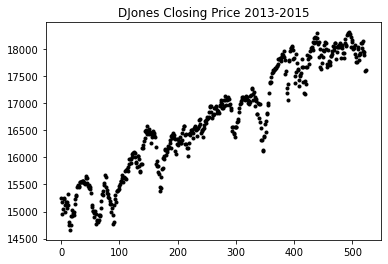

In [176]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title(f'{index} Closing Price {historical_period}')
plt.show()

### Predictive Model - Decline and Recovery

In [177]:
data = data[['Date', 'Close']]
data = data.rename(columns = {"Date":"ds","Close":"y"})

from fbprophet import Prophet

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
884,2016-06-25,19005.450819,17883.319956,19680.169118,18160.815466,19876.506554,-226.790371,-226.790371,-226.790371,-186.094996,...,23.261876,23.261876,23.261876,-63.957251,-63.957251,-63.957251,0.0,0.0,0.0,18778.660448
885,2016-06-26,19007.677262,17895.644410,19704.705067,18158.482797,19881.277378,-224.276059,-224.276059,-224.276059,-186.094996,...,23.261874,23.261874,23.261874,-61.442937,-61.442937,-61.442937,0.0,0.0,0.0,18783.401203
886,2016-06-27,19009.903706,17888.766608,19675.324283,18156.150127,19886.945209,-253.609213,-253.609213,-253.609213,-186.094996,...,-10.787552,-10.787552,-10.787552,-56.726665,-56.726665,-56.726665,0.0,0.0,0.0,18756.294493
887,2016-06-28,19012.130149,17886.673056,19679.138370,18152.759017,19892.486973,-250.591544,-250.591544,-250.591544,-186.094996,...,-14.629896,-14.629896,-14.629896,-49.866651,-49.866651,-49.866651,0.0,0.0,0.0,18761.538606
888,2016-06-29,19014.356593,17902.121084,19693.838386,18148.684242,19898.028738,-243.904793,-243.904793,-243.904793,-186.094996,...,-16.842815,-16.842815,-16.842815,-40.966982,-40.966982,-40.966982,0.0,0.0,0.0,18770.451800


In [186]:
global_slowdown_fear_predict = prediction[['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper']]
global_slowdown_fear_predict.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper
884,2016-06-25,19005.450819,17883.319956,19680.169118,18160.815466,19876.506554
885,2016-06-26,19007.677262,17895.644410,19704.705067,18158.482797,19881.277378
886,2016-06-27,19009.903706,17888.766608,19675.324283,18156.150127,19886.945209
887,2016-06-28,19012.130149,17886.673056,19679.138370,18152.759017,19892.486973
888,2016-06-29,19014.356593,17902.121084,19693.838386,18148.684242,19898.028738


In [183]:
global_slowdown_fear_predict.to_sql(name = 'global_slowdown_fear_predict', if_exists='append', con=conn, index=False)

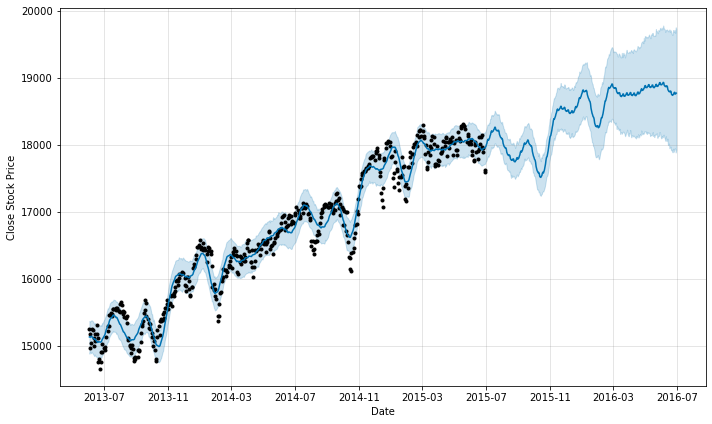

In [145]:
figure = m.plot(prediction)
#plt.title(f"{index} Prediction - {prediction_period}")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
#figure.savefig(f'../static/images/{index}_{prediction_period}.png')

#### Summary: When zooming into a short period of time, the predictive model gives a fairly accurate prediction on the pace of the market's decline and recovery.

## Part 2: 2008 - 2011 Periods

### Historical Data

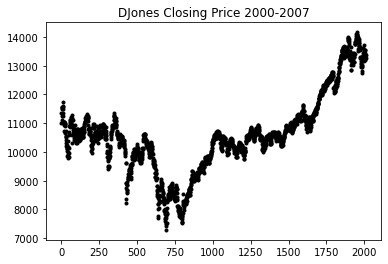

In [129]:
historical_period = "2000-2007"
prediction_period = "2008-2009"
index = "DJones"

query = '''
select * from DJones
where Date > "2000-01-01" and Date < "2008-01-01"
'''

data = pd.read_sql(query, conn)

df_close = data['Close']
df_close.plot(style='k.')
plt.title(f'{index} Closing Price {historical_period}')
plt.show()

### Predictive Model - Decline

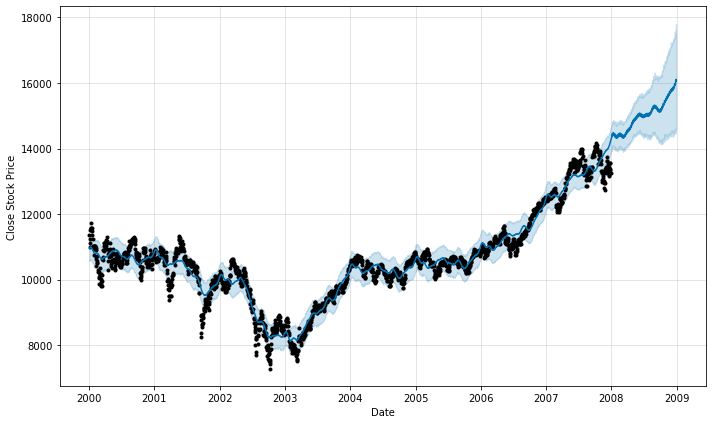

In [130]:
data = data[['Date', 'Close']]
data = data.rename(columns = {"Date":"ds","Close":"y"})

from fbprophet import Prophet

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)

figure = m.plot(prediction)
#plt.title(f"{index} Prediction - {prediction_period}")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
#figure.savefig(f'../static/images/{index}_{prediction_period}.png')

#### Summary: The predicition library failed to predict the decline

### Predictive Model - Recovery

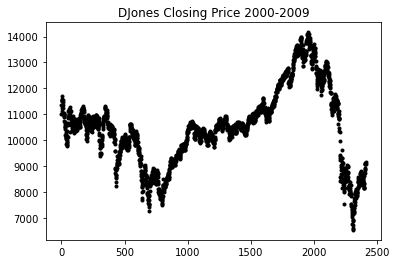

In [131]:
historical_period = "2000-2009"
prediction_period = "2009-2010"
index = "DJones"

query = '''
select * from DJones
where Date > "2000-01-01" and Date < "2009-07-31"
'''

data = pd.read_sql(query, conn)

df_close = data['Close']
df_close.plot(style='k.')
plt.title(f'{index} Closing Price {historical_period}')
plt.show()

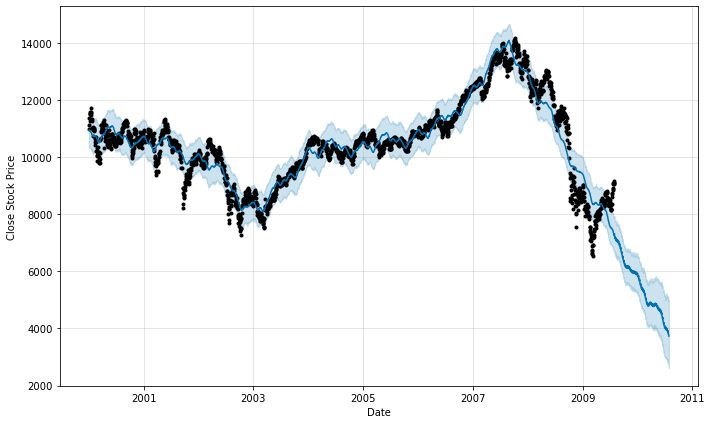

In [127]:
data = data[['Date', 'Close']]

data = data.rename(columns = {"Date":"ds","Close":"y"})
#data.tail()

from fbprophet import Prophet

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)

figure = m.plot(prediction)
#plt.title(f"{index} Prediction - {prediction_period}")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
#figure.savefig(f'../static/images/{index}_{prediction_period}.png')

#### Summary: The prediction failed to predict the recovery.

----------------------------------------------

------------------------------------------------------------------------------------------

## Part 3: Covid-19 Pandemic (2020)

### Will the predictive Model accurately predict the market performance during the covid pandemic?

### Historical Data

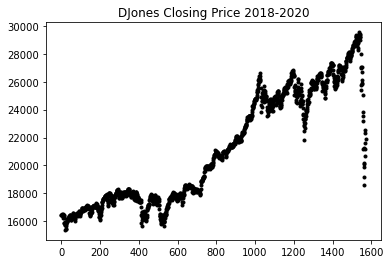

In [165]:
historical_period = "2018-2020"
prediction_period = "2020-2021"
index = "DJones"

query = '''
select * from DJones
where Date > "2014-01-01" and Date < "2020-04-01"
'''

data = pd.read_sql(query, conn)

df_close = data['Close']
df_close.plot(style='k.')
plt.title(f'{index} Closing Price {historical_period}')
plt.show()

### Predictive Model - Decline

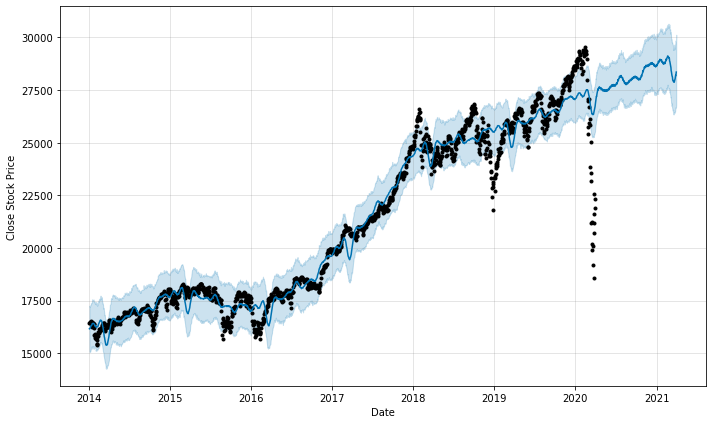

In [166]:
data = data[['Date', 'Close']]
data = data.rename(columns = {"Date":"ds","Close":"y"})

from fbprophet import Prophet

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)

figure = m.plot(prediction)
#plt.title(f"{index} Prediction - {prediction_period}")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
#figure.savefig(f'../static/images/{index}_{prediction_period}.png')

### Predictive Model - Recovery

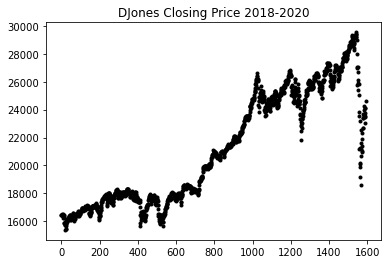

In [160]:
historical_period = "2018-2020"
prediction_period = "2020-2021"
index = "DJones"

query = '''
select * from DJones
where Date > "2014-01-01" and Date < "2020-04-30"
'''

data = pd.read_sql(query, conn)

df_close = data['Close']
df_close.plot(style='k.')
plt.title(f'{index} Closing Price {historical_period}')
plt.show()

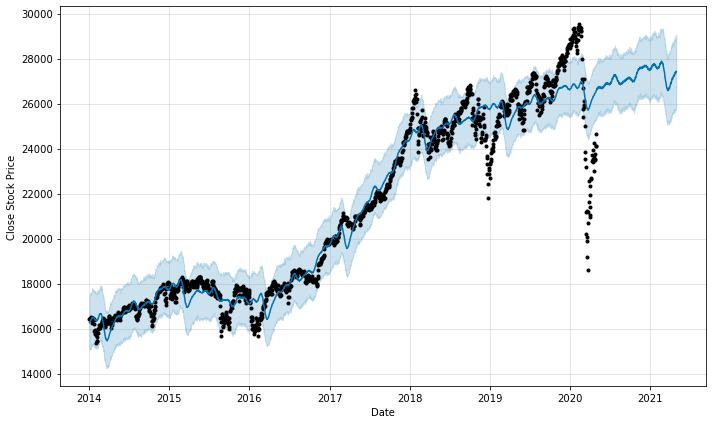

In [161]:
data = data[['Date', 'Close']]

data = data.rename(columns = {"Date":"ds","Close":"y"})
#data.tail()

from fbprophet import Prophet

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)

figure = m.plot(prediction)
#plt.title(f"{index} Prediction - {prediction_period}")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
#figure.savefig(f'../static/images/{index}_{prediction_period}.png')